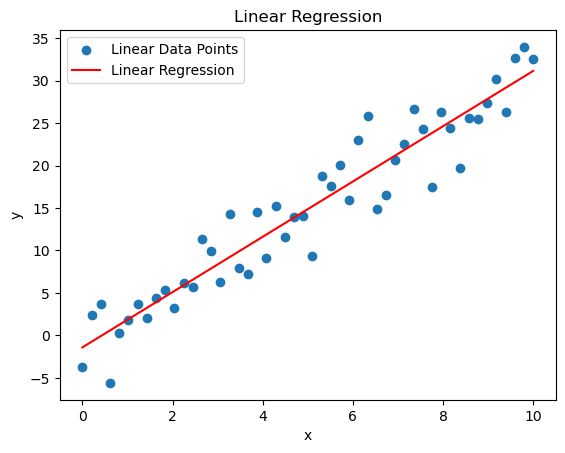

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression


# Generate linear data points
x_linear = np.linspace(0, 10, 50)
y_linear = 3 * x_linear + np.random.normal(0, 3, size=50)

# Fit linear regression line
coefficients_linear = np.polyfit(x_linear, y_linear, deg=1)
linear_fit = np.poly1d(coefficients_linear)

# Plot linear data points and regression line
plt.scatter(x_linear, y_linear, label='Linear Data Points')
plt.plot(x_linear, linear_fit(x_linear), color='red', label='Linear Regression')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression')
plt.show()

AttributeError: 'Poly3DCollection' object has no attribute '_facecolors2d'

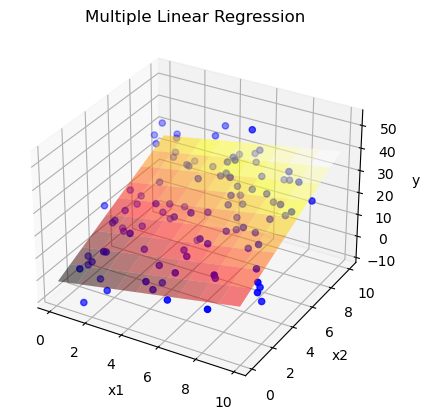

In [2]:

# Generate random data for demonstration
np.random.seed(0)
n_samples = 100
x1 = np.random.uniform(low=0, high=10, size=n_samples)
x2 = np.random.uniform(low=0, high=10, size=n_samples)
error = np.random.normal(loc=0, scale=10, size=n_samples)
y = 2 * x1 + 3 * x2 - 5 + error

# Fit multiple linear regression model
model = LinearRegression()
model.fit(np.column_stack((x1, x2)), y)

# Generate predictions
x1_range = np.linspace(min(x1), max(x1), 10)
x2_range = np.linspace(min(x2), max(x2), 10)
x1_range, x2_range = np.meshgrid(x1_range, x2_range)
y_pred = model.predict(np.column_stack((x1_range.ravel(), x2_range.ravel())))
y_pred = y_pred.reshape(x1_range.shape)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='blue', label='Data Points')
r=ax.plot_surface(x1_range, x2_range, y_pred, alpha=0.5, cmap='hot', label='Regression Plane')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Multiple Linear Regression')
ax.legend()
r.get_facecolors()

plt.show()

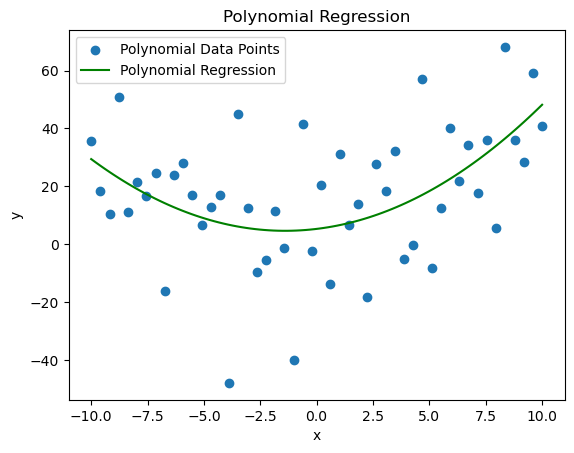

In [3]:
# Generate polynomial data points
x_poly = np.linspace(-10, 10, 50)
y_poly = 0.5 * x_poly ** 2 + np.random.normal(0, 20, size=50)

# Fit polynomial regression curve
coefficients_poly = np.polyfit(x_poly, y_poly, deg=2)
poly_fit = np.poly1d(coefficients_poly)

# Plot polynomial data points and regression curve
plt.scatter(x_poly, y_poly, label='Polynomial Data Points')
x_range = np.linspace(-10, 10, 100)
plt.plot(x_range, poly_fit(x_range), color='green', label='Polynomial Regression')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression')
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [5]:
# Generate polynomial data points
x_poly = np.linspace(-10, 10, 50)
y_poly = 0.5 * x_poly ** 2 + np.random.normal(0, 20, size=50)

# Reshape the data
x_poly = x_poly.reshape(-1, 1)
y_poly = y_poly.reshape(-1, 1)



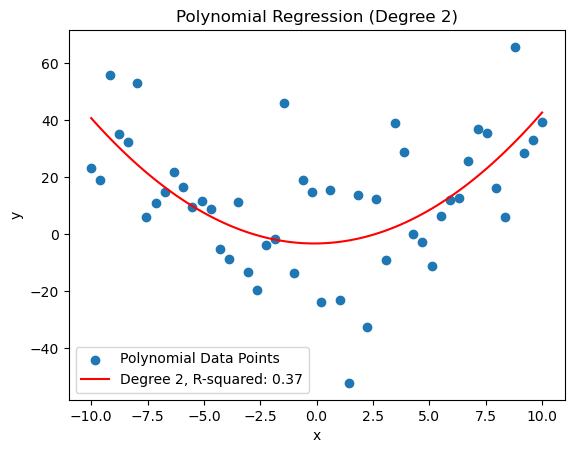

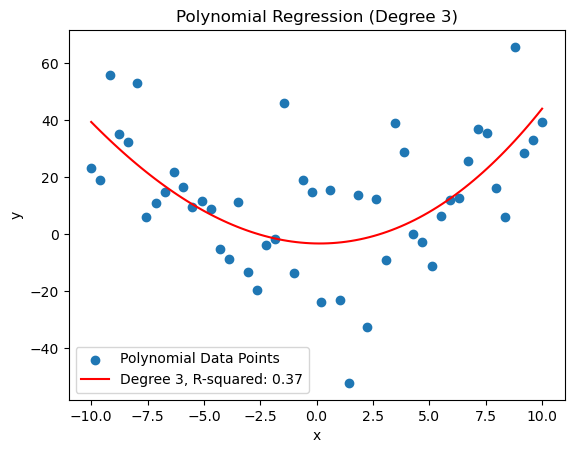

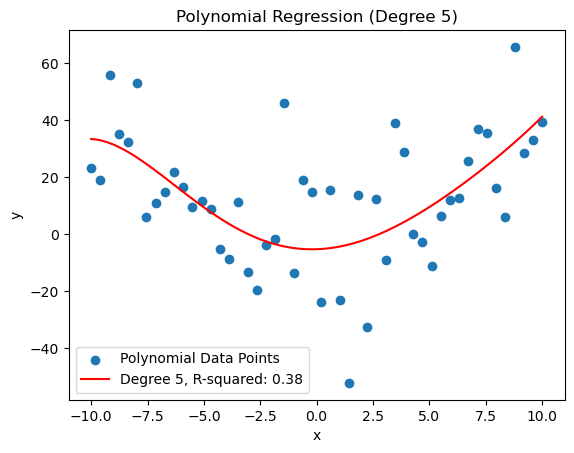

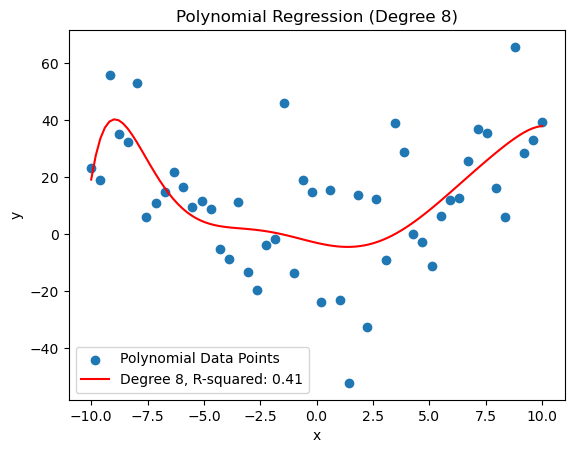

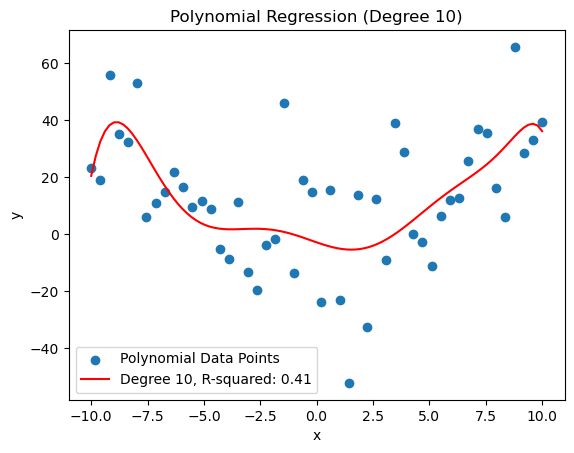

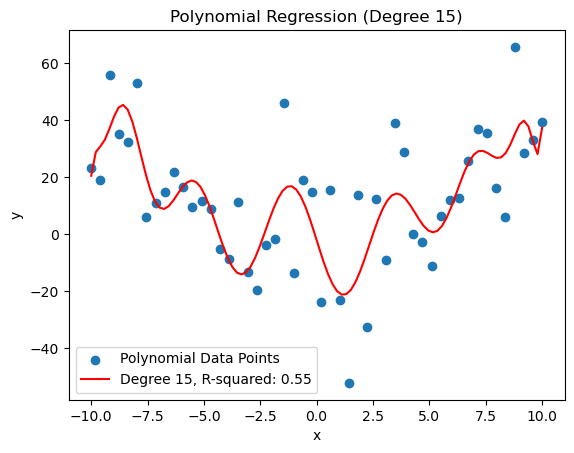

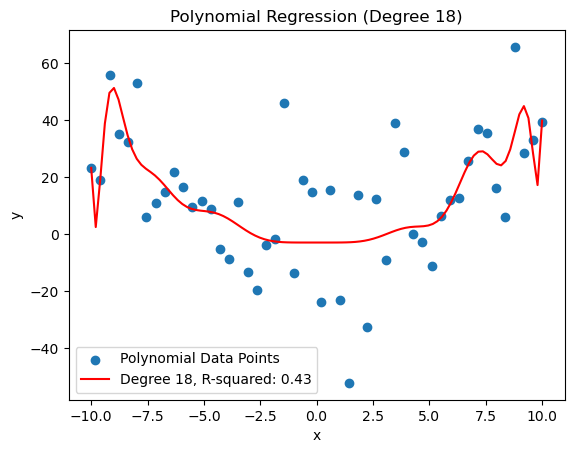

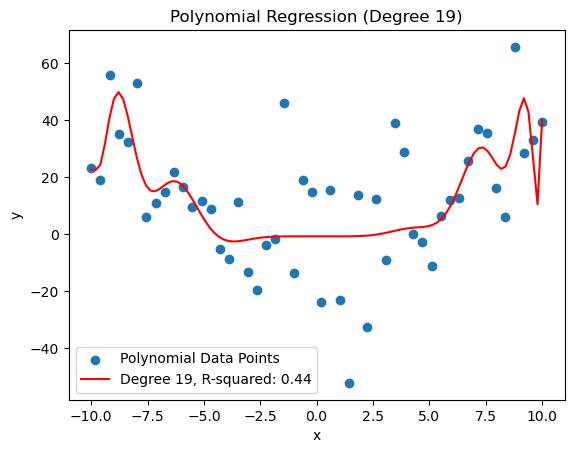

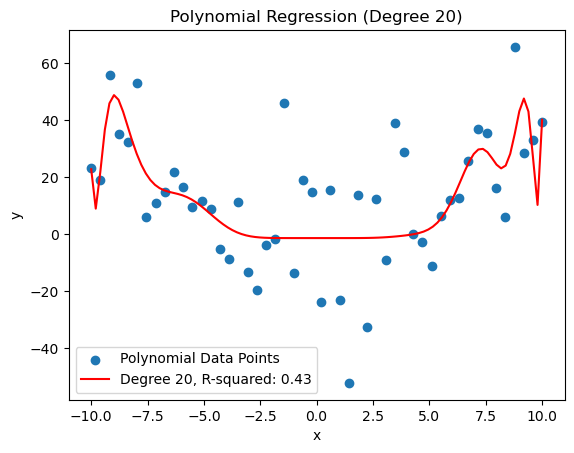

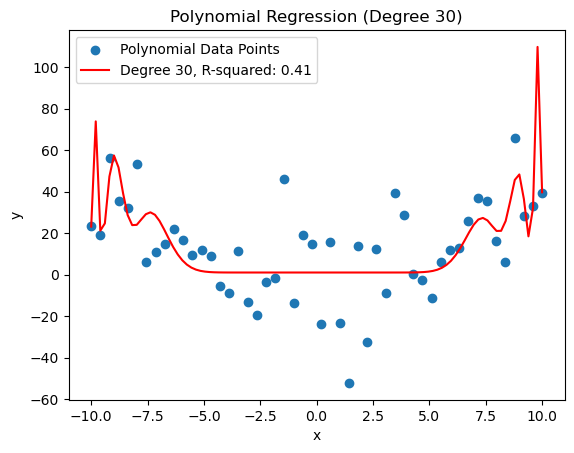

In [6]:
# Define the degrees for polynomial regression
degrees = [2, 3, 5, 8, 10, 15, 18,19, 20, 30]

# Perform polynomial regression for each degree and plot the regression lines
for degree in degrees:
    # Create polynomial features
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly_transformed = polynomial_features.fit_transform(x_poly)

    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(x_poly_transformed, y_poly)

    # Generate predictions
    x_range = np.linspace(-10, 10, 100).reshape(-1, 1)
    x_range_transformed = polynomial_features.transform(x_range)
    y_pred = model.predict(x_range_transformed)

    # Calculate R-squared score
    y_pred_train = model.predict(x_poly_transformed)
    r2 = r2_score(y_poly, y_pred_train)

    # Plot the polynomial regression line with R-squared score
    plt.figure()
    plt.scatter(x_poly, y_poly, label='Polynomial Data Points')
    plt.plot(x_range, y_pred, color='red', label=f'Degree {degree}, R-squared: {r2:.2f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(f'Polynomial Regression (Degree {degree})')

plt.show()

In [8]:
# Define the degrees for polynomial regression
degrees = [2, 3, 5, 8, 10, 15, 18, 19, 20, 30]

# Initialize variables to track optimal degree and R-squared score
optimal_degree = None
max_r2 = -np.inf

# Perform polynomial regression for each degree and calculate the R-squared score
for degree in degrees:
    # Create polynomial features
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly_transformed = polynomial_features.fit_transform(x_poly)

    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(x_poly_transformed, y_poly)

    # Generate predictions
    x_range = np.linspace(-10, 10, 100).reshape(-1, 1)
    x_range_transformed = polynomial_features.transform(x_range)
    y_pred = model.predict(x_range_transformed)

    # Calculate R-squared score
    y_pred_train = model.predict(x_poly_transformed)
    r2 = r2_score(y_poly, y_pred_train)

    # Update optimal degree and R-squared score if necessary
    if r2 > max_r2:
        optimal_degree = degree
        max_r2 = r2

    # Plot the polynomial regression line with R-squared score
    plt.figure()
    plt.scatter(x_poly, y_poly, label='Polynomial Data Points')
    plt.plot(x_range, y_pred, color='red', label=f'Degree {degree}, R-squared: {r2:.2f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(f'Polynomial Regression (Degree {degree})')

plt.show()

# Print the optimal degree and its corresponding R-squared score
print(f'Optimal Degree: {optimal_degree}, R-squared: {max_r2:.2f}')

ValueError: Found input variables with inconsistent numbers of samples: [50, 100]

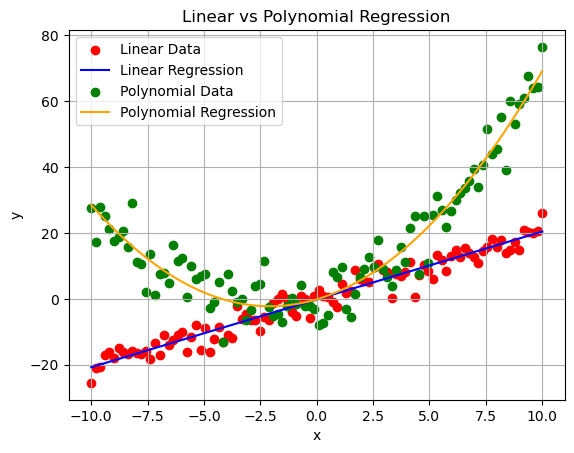

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
x = np.linspace(-10, 10, 100)
y_linear = 2 * x + np.random.randn(100) * 3  # Linear relationship with some noise
y_poly = 0.5 * x**2 + 2 * x + np.random.randn(100) * 5  # Polynomial relationship with noise

# Perform linear regression
linear_coeffs = np.polyfit(x, y_linear, 1)
linear_fit = np.polyval(linear_coeffs, x)

# Perform polynomial regression
poly_coeffs = np.polyfit(x, y_poly, 2)
poly_fit = np.polyval(poly_coeffs, x)

# Plot the data points and regression lines
plt.scatter(x, y_linear, label='Linear Data', color='red')
plt.plot(x, linear_fit, label='Linear Regression', color='blue')

plt.scatter(x, y_poly, label='Polynomial Data', color='green')
plt.plot(x, poly_fit, label='Polynomial Regression', color='orange')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear vs Polynomial Regression')
plt.grid(True)
plt.show()